# Representational Similarity Analysis

In [1]:
import numpy as np

import torch
from torch.utils.data import DataLoader

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.ml.rsa import run_rsa
from src.ml.utils import set_seed
from src.ml.model import FMRIClassifier
from src.ml.noise import stim_noise_test
from src.dataset.kay import load_dataset
from src.ml.utils import calc_blur_acc_change
from src.ml.dataset import StimulusDataset, FMRIDataset
from src.utils.util import prepare_stimulus_data, prepare_fmri_data
from src.ml.config import StimulusClassifierConfig, FMRIClassifierConfig

In [2]:
%matplotlib inline

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

title_size = 16
params = {
    "legend.fontsize": 14,
    "axes.labelsize": title_size - 2,
    "axes.titlesize": title_size,
    "xtick.labelsize": title_size - 4,
    "ytick.labelsize": title_size - 4,
    "axes.titlepad": 1.5 * title_size,
}

plt.rcParams.update(params)

set_seed(101)

## Load Model Configuration

In [3]:
stim_config = StimulusClassifierConfig()
fmri_config = FMRIClassifierConfig()

## Load Data

In [4]:
all_data = load_dataset(data_path="./../data/")

x_stim, y_stim = prepare_stimulus_data(
    all_data=all_data,
    data_subset="test",
    class_ignore_list=stim_config.class_ignore_list,
    label_level=stim_config.label_level,
)

x_fmri, y_fmri = prepare_fmri_data(
    all_data=all_data,
    data_subset="test",
    class_ignore_list=fmri_config.class_ignore_list,
    label_level=fmri_config.label_level,
    roi_select_list=fmri_config.roi_select_list,
)

x_stim.shape, y_stim.shape, x_fmri.shape, y_fmri.shape

((114, 128, 128), (114,), (114, 8427), (114,))

In [5]:
assert len(np.unique(y_stim)) == len(np.unique(y_fmri))
class2idx = {k: i for i, k in enumerate(np.unique(y_stim))}
idx2class = {v: k for k, v in class2idx.items()}

In [6]:
stim_dataset = StimulusDataset(
    x_data=x_stim,
    y_data=y_stim,
    img_transform=stim_config.img_transform["test"],
    class2idx=class2idx,
)

stim_loader = DataLoader(dataset=stim_dataset, shuffle=False, batch_size=1)


fmri_dataset = FMRIDataset(x_data=x_fmri, y_data=y_fmri, class2idx=class2idx)

fmri_loader = DataLoader(dataset=fmri_dataset, shuffle=False, batch_size=1)

## Load Model

In [7]:
fmri_model = FMRIClassifier(num_features=x_fmri.shape[1], num_classes=len(class2idx))
fmri_model.load_state_dict(
    torch.load(
        "./../models/fmri_classifier/fmri_classifier_model.pth",
        map_location="cpu",
    ),
)
fmri_model.eval()

print("fMRI model loaded successfully.")

fMRI model loaded successfully.


## Cosine Similarity Matrix

  0%|          | 0/5 [00:00<?, ?it/s]

/home/akshaj/miniconda3/envs/decoding-thoughts/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


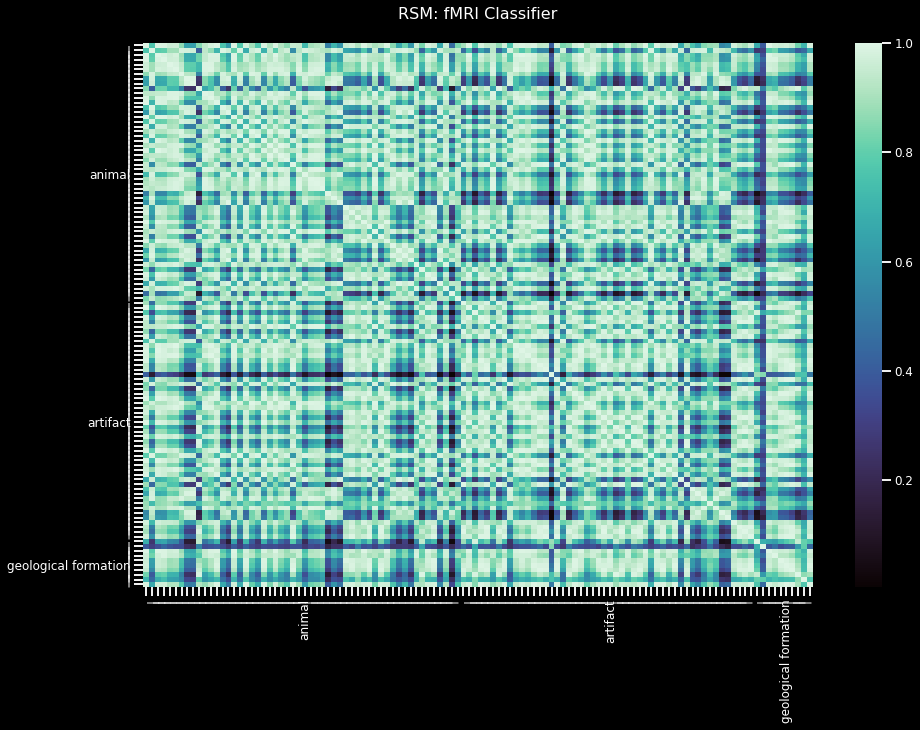

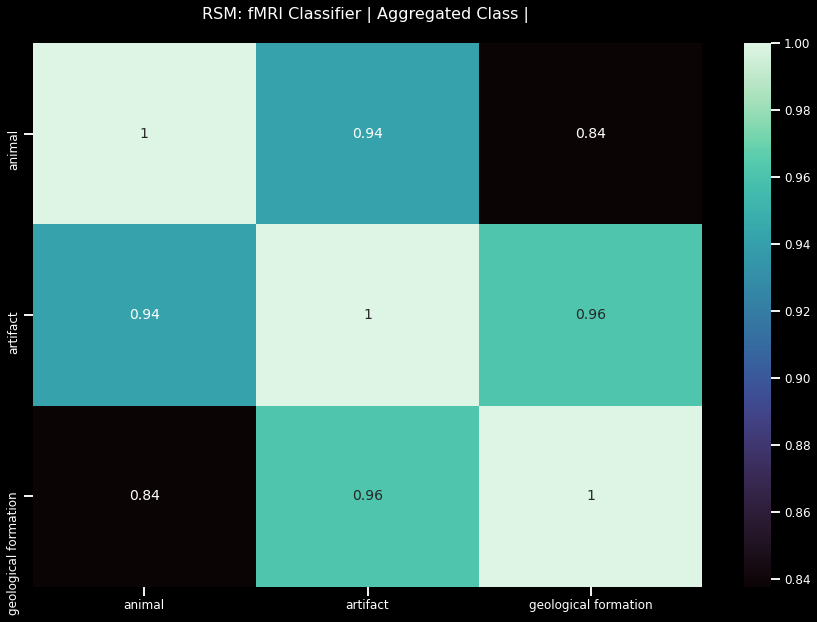

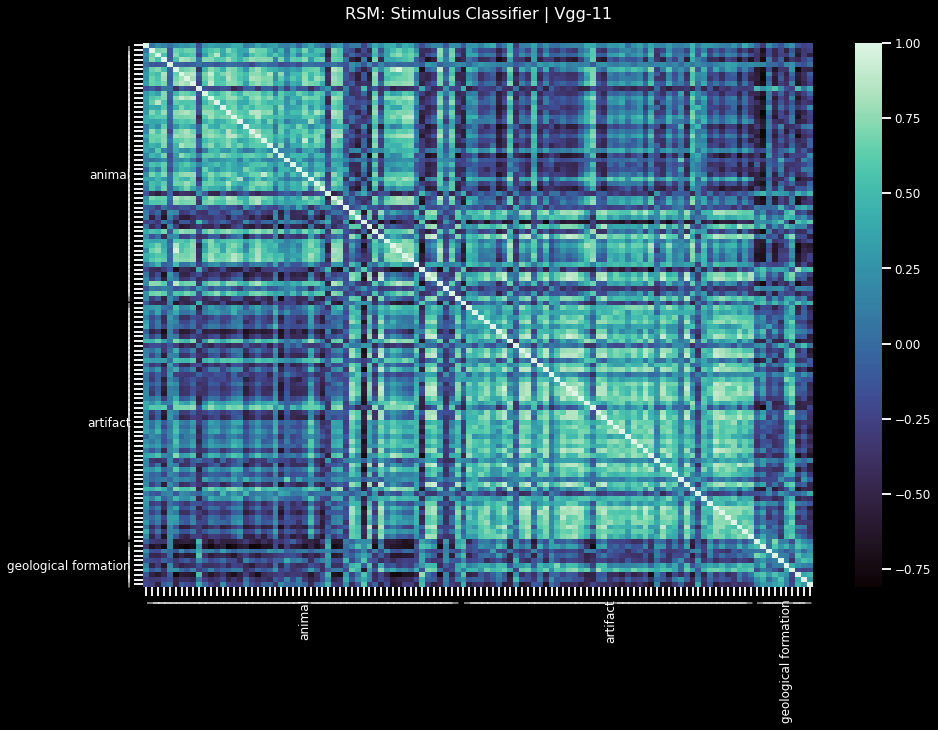

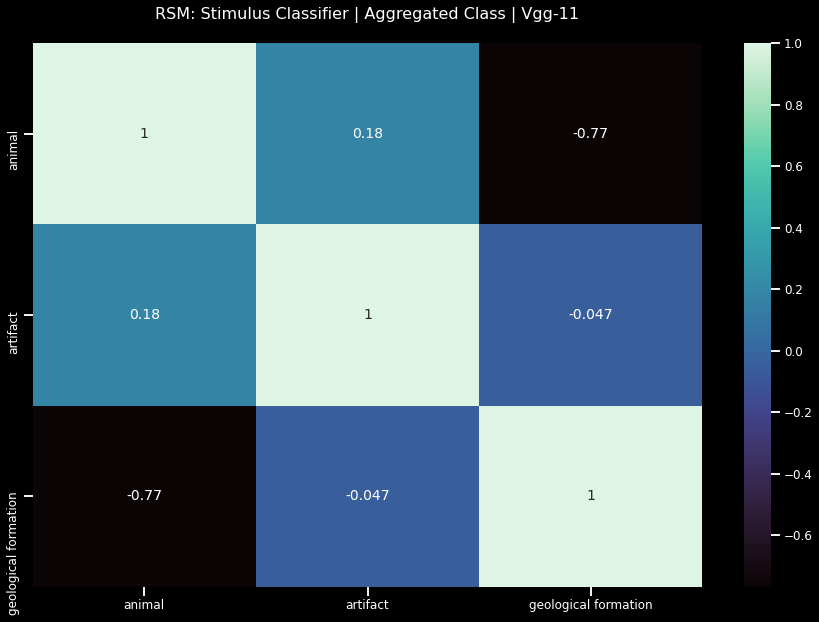

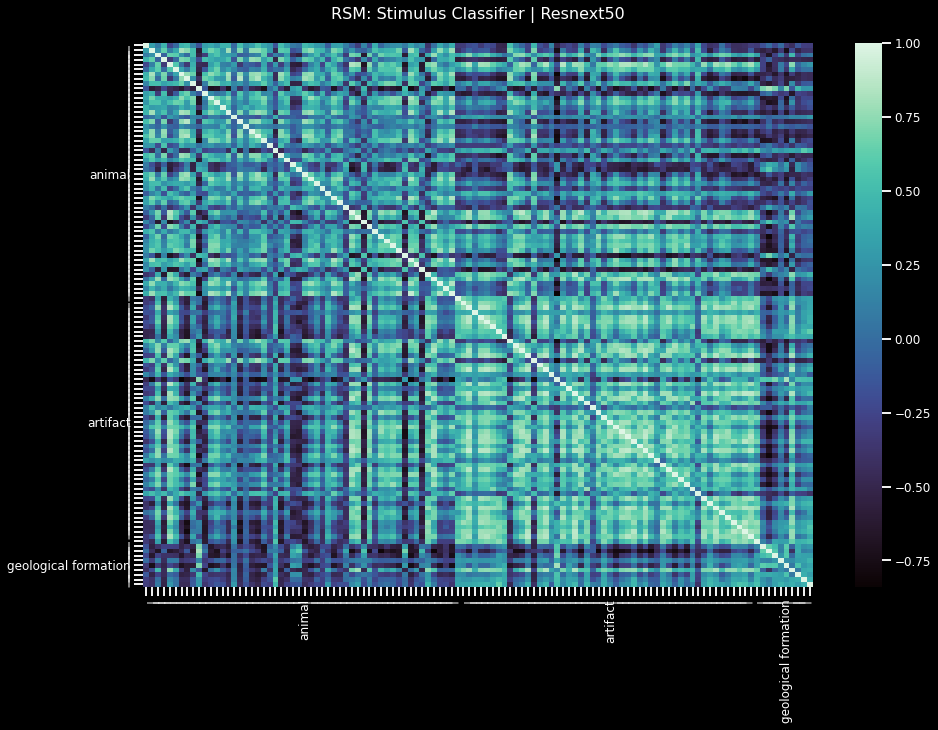

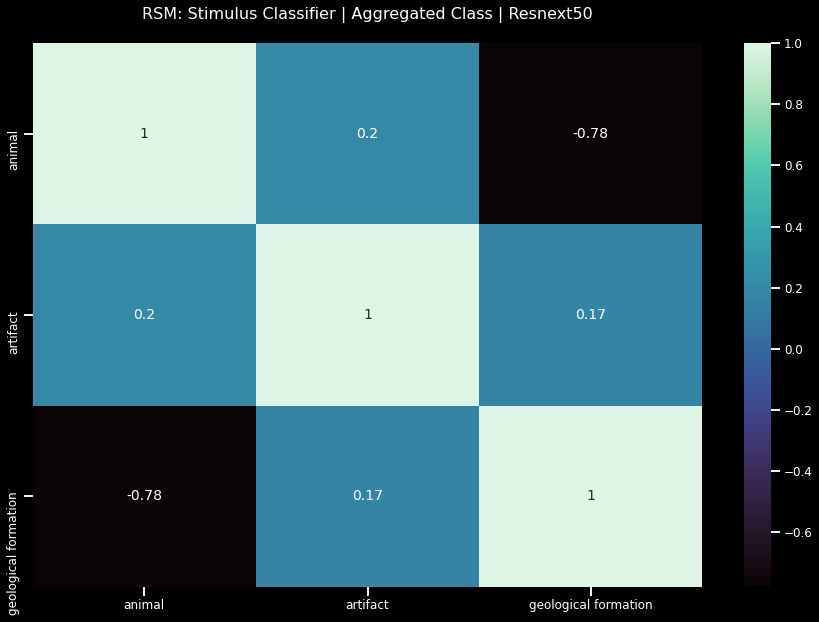

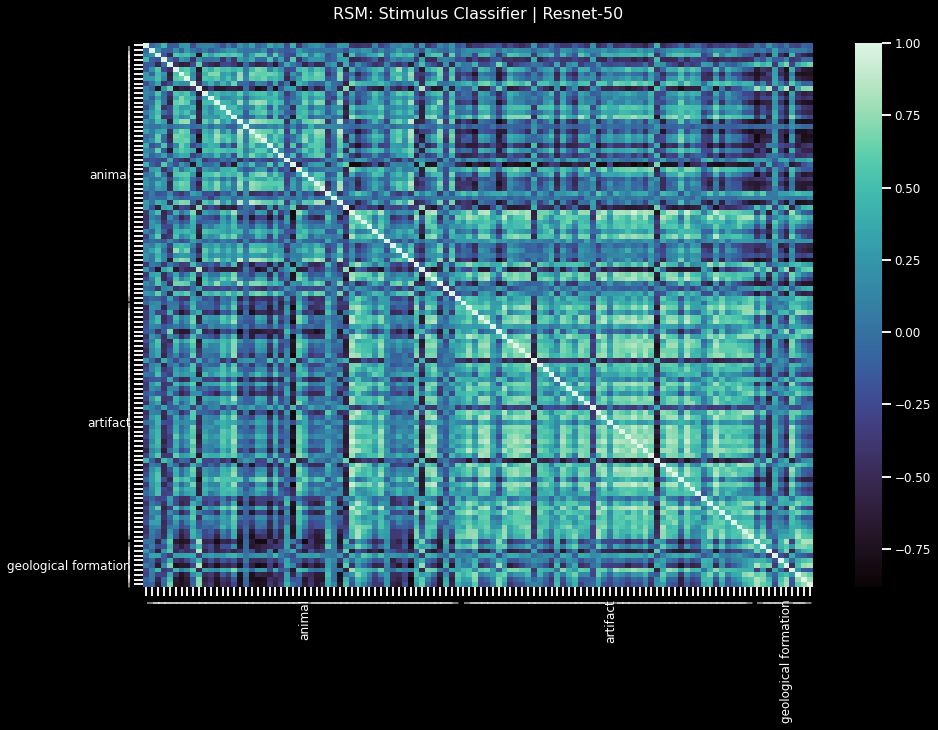

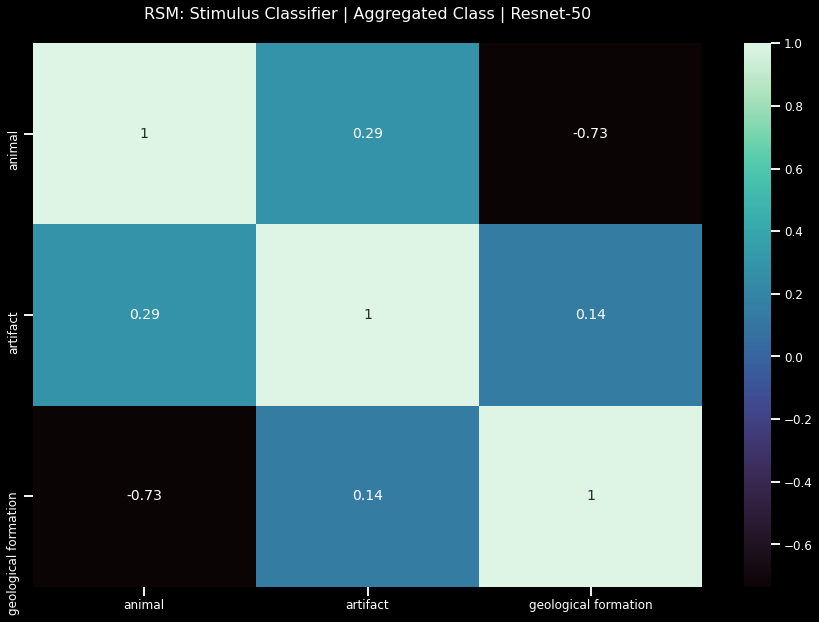

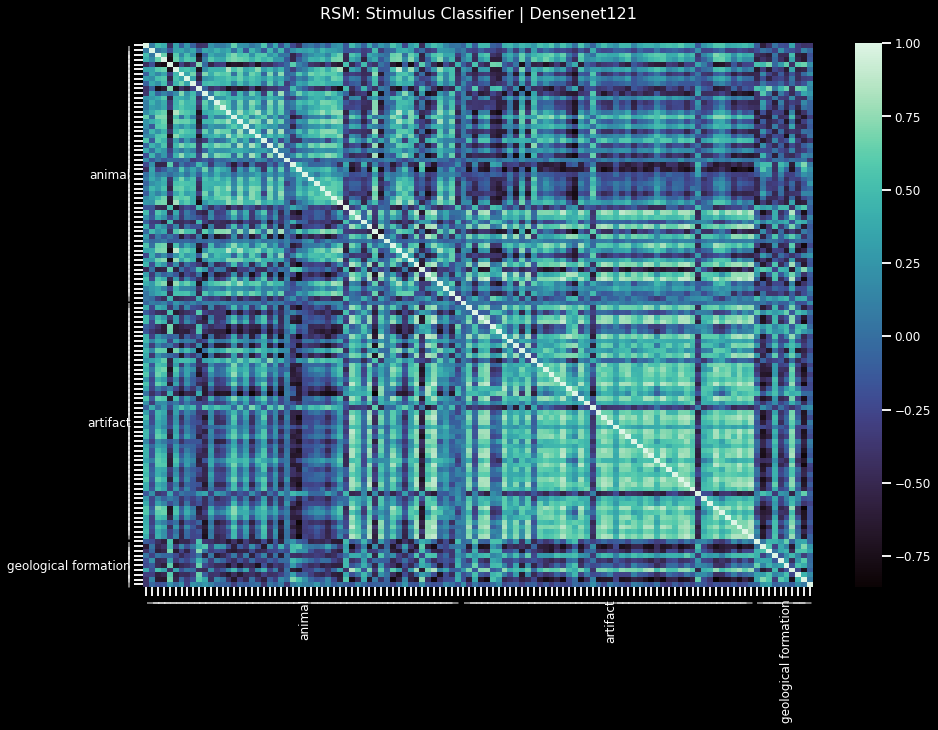

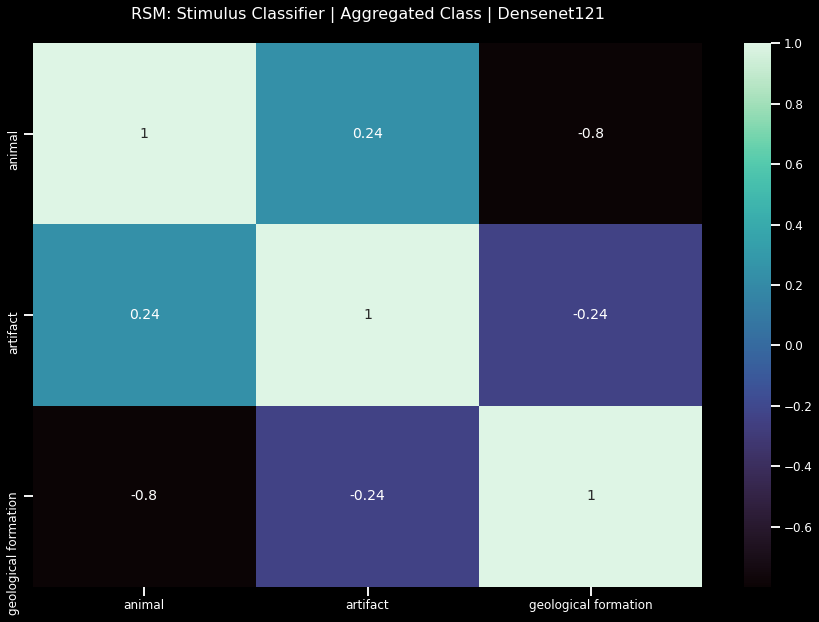

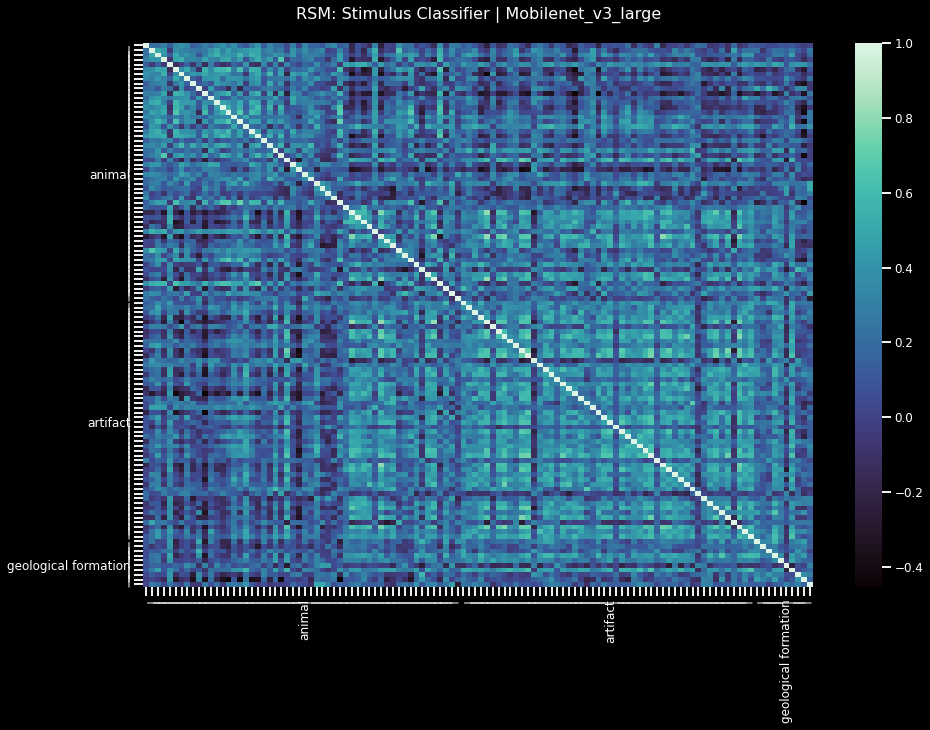

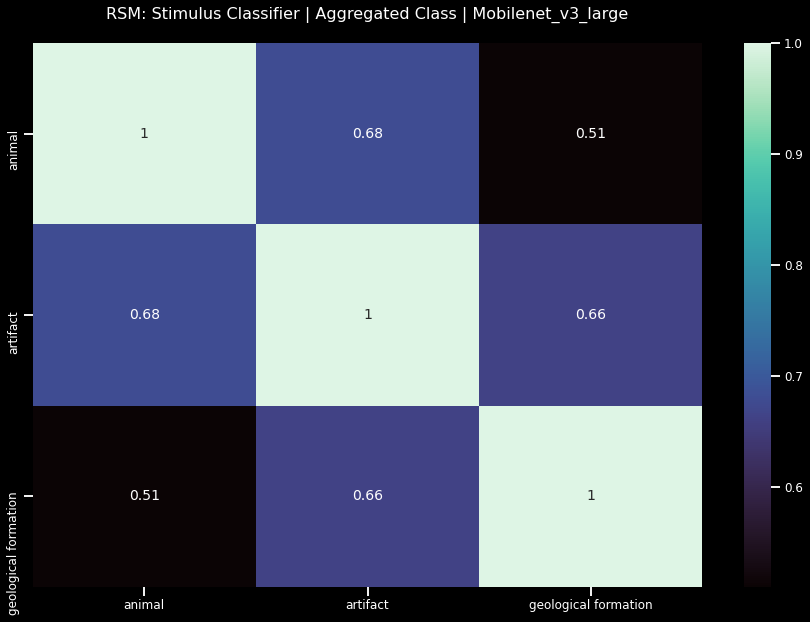

In [8]:
(
    stim_model_names,
    stim_vs_fmri_rsm_corr,
    stim_model_norm_list,
    stim_model_num_param_list,
) = run_rsa(
    fmri_model=fmri_model,
    fmri_loader=fmri_loader,
    fmri_config=fmri_config,
    stim_loader=stim_loader,
    stim_config=stim_config,
    class2idx=class2idx,
    idx2class=idx2class,
)

Text(0.5, 0.98, 'Stimulus Model Characterstics')

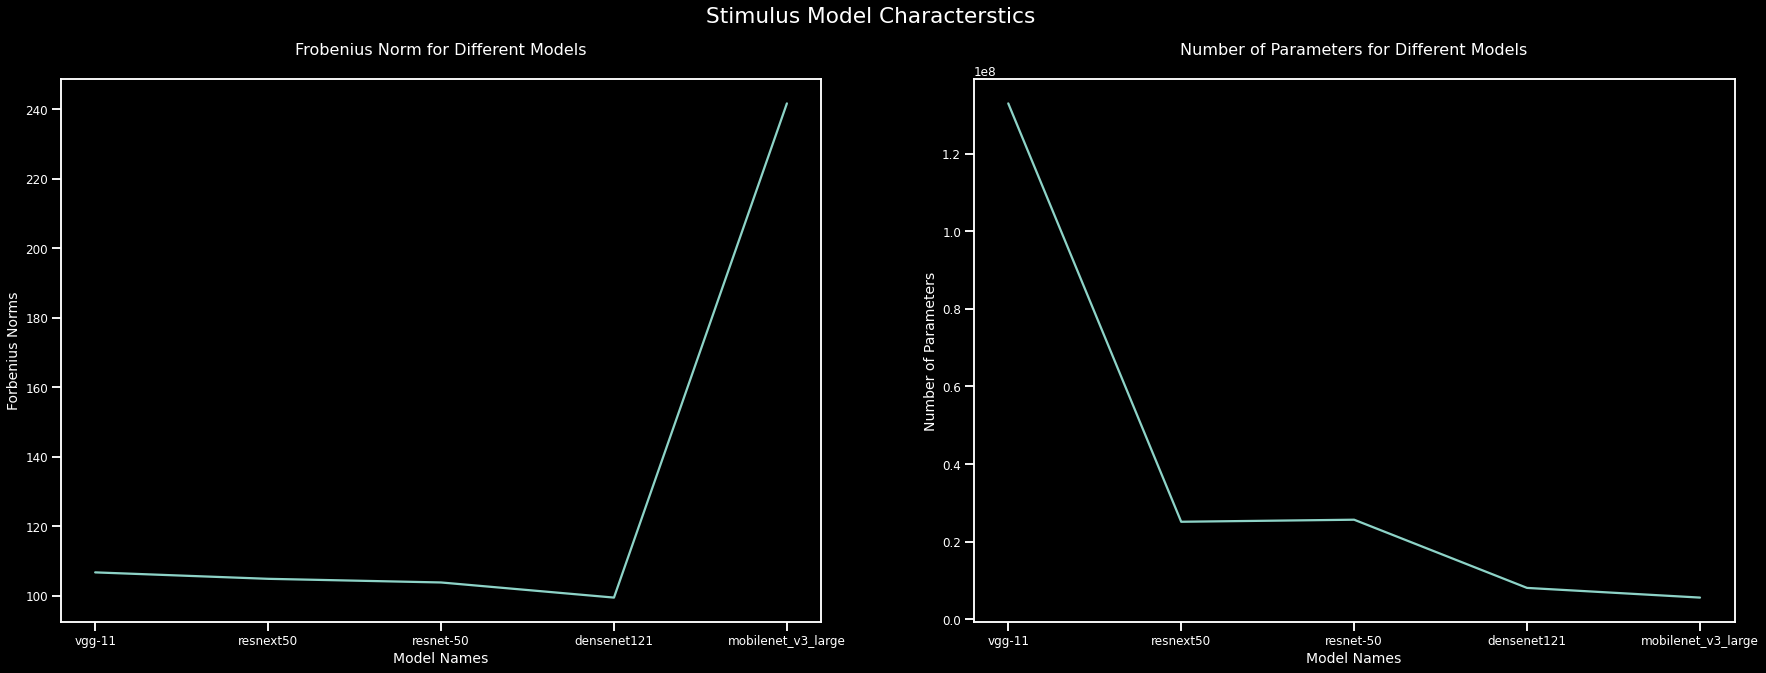

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
sns.lineplot(x=stim_model_names, y=stim_model_norm_list, ax=axes[0])
axes[0].set_title("Frobenius Norm for Different Models")
axes[0].set_xlabel("Model Names")
axes[0].set_ylabel("Forbenius Norms")

sns.lineplot(x=stim_model_names, y=stim_model_num_param_list, ax=axes[1])
axes[1].set_title("Number of Parameters for Different Models")
axes[1].set_xlabel("Model Names")
axes[1].set_ylabel("Number of Parameters")


plt.suptitle("Stimulus Model Characterstics")

Text(0, 0.5, 'Correlation Between RSMs')

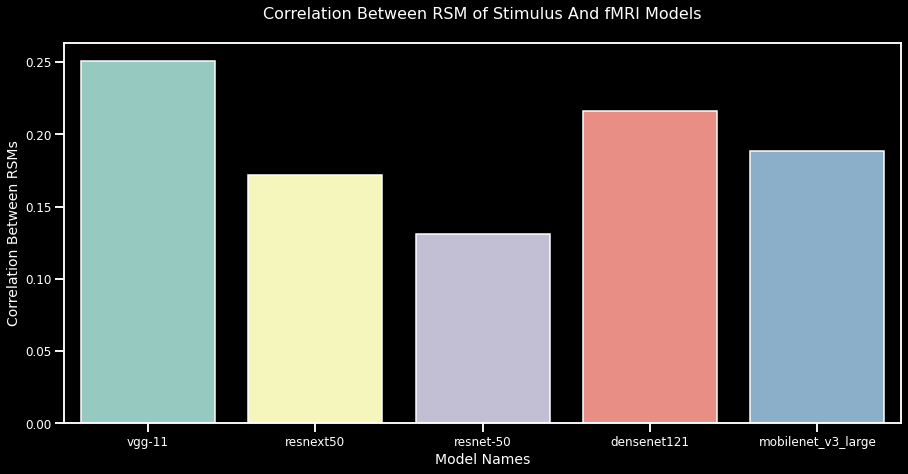

In [10]:
plt.figure(figsize=(15, 7))
sns.barplot(x=stim_model_names, y=stim_vs_fmri_rsm_corr)
plt.title("Correlation Between RSM of Stimulus And fMRI Models")
plt.xlabel("Model Names")
plt.ylabel("Correlation Between RSMs")

## Noise Test

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

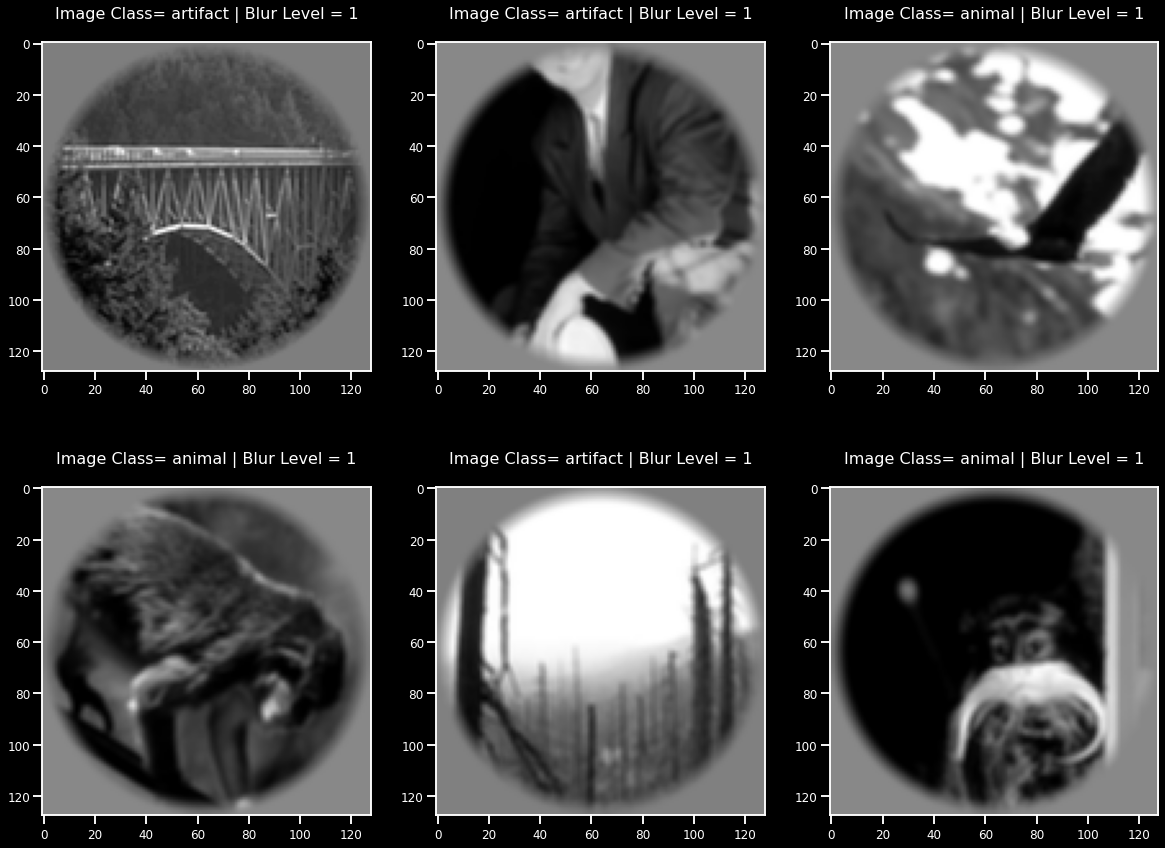

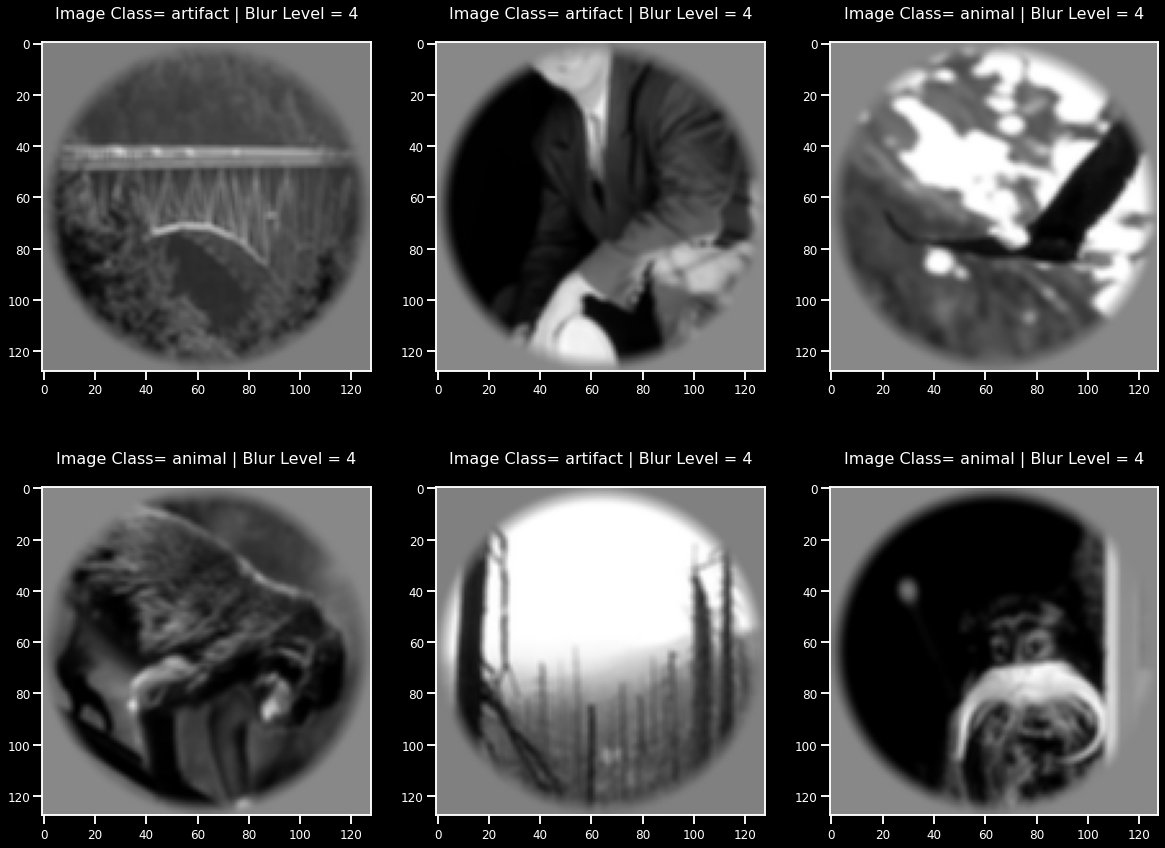

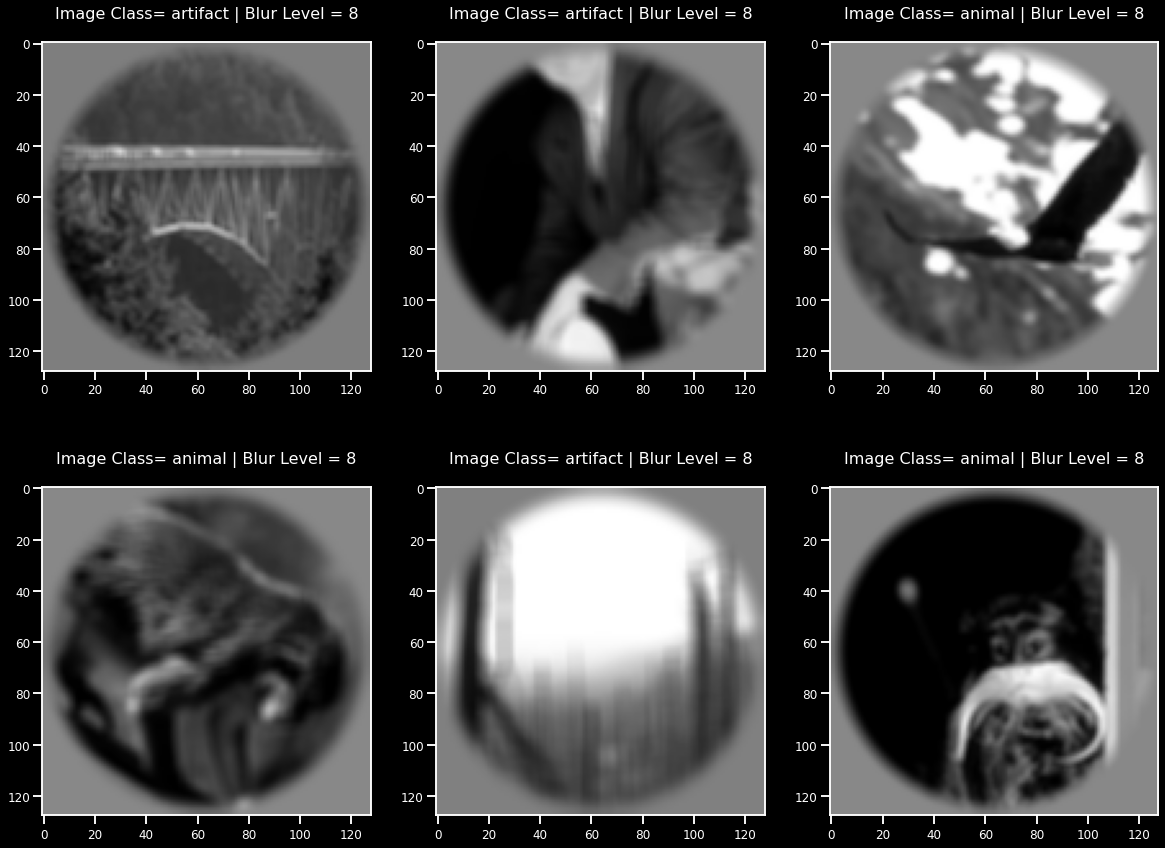

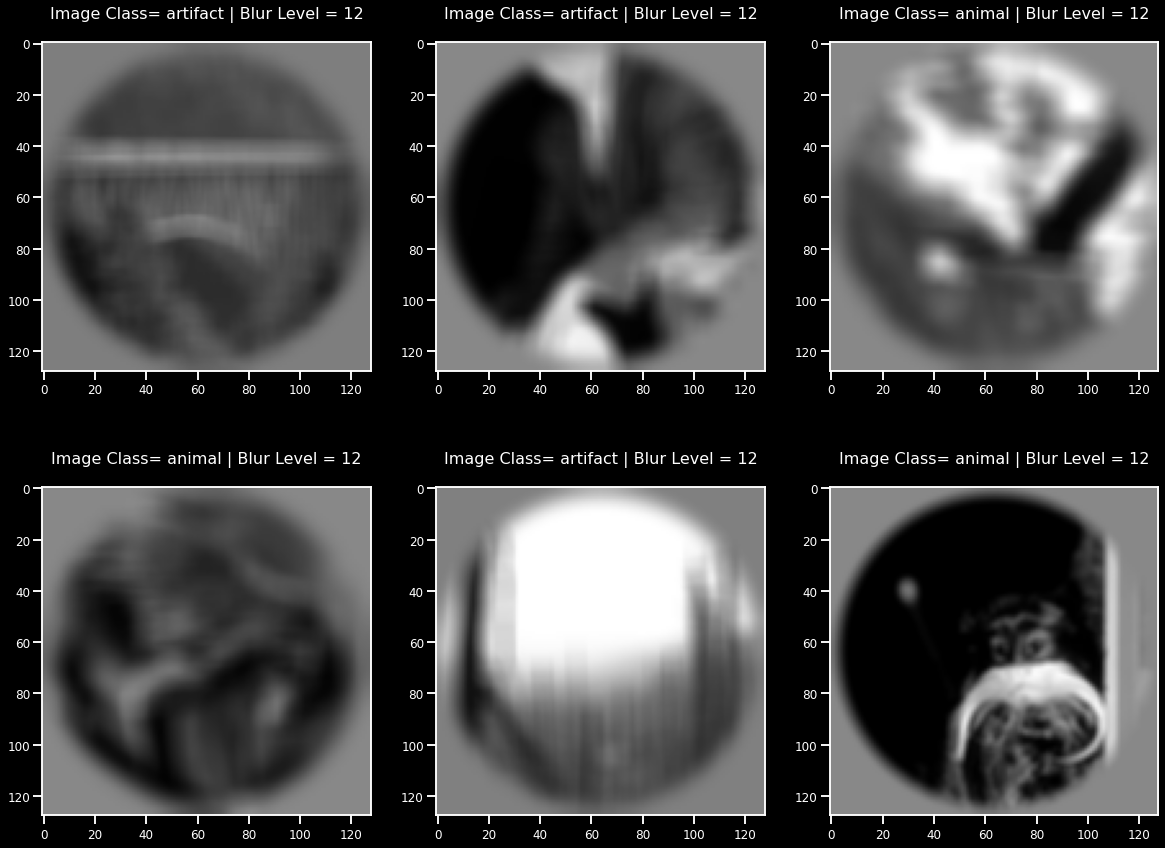

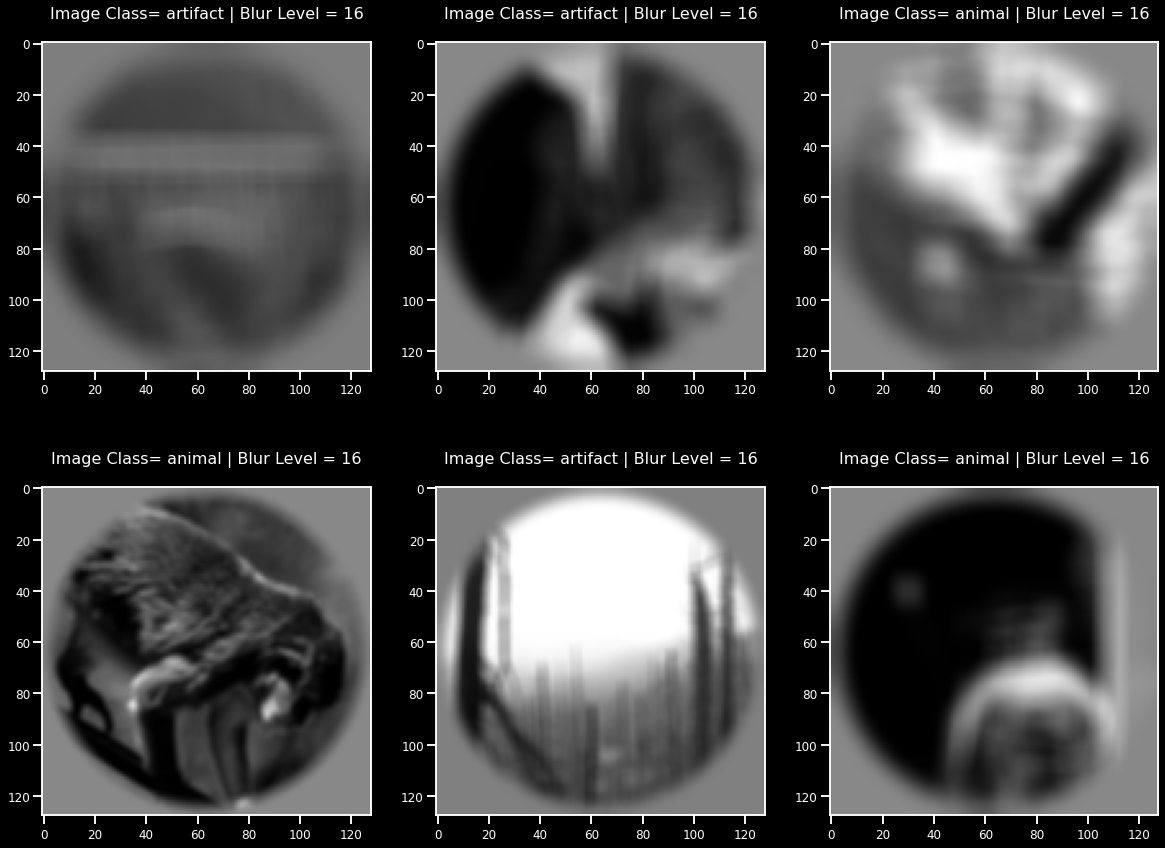

In [11]:
blur_model_acc_list = stim_noise_test(
    blur_level_list=[1, 4, 8, 12, 16],
    config=stim_config,
    class2idx=class2idx,
    idx2class=idx2class,
)

Text(0.5, 1.0, 'Blur vs Accuracy For All Stimulus Models')

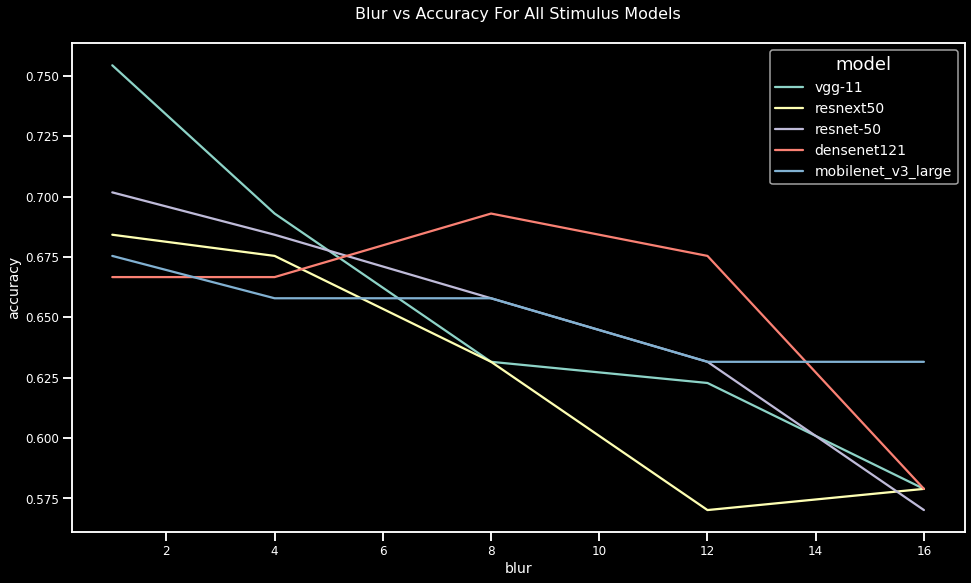

In [12]:
blur_model_acc_df = pd.DataFrame(
    blur_model_acc_list, columns=["blur", "model", "accuracy"]
)
plt.figure(figsize=(16, 9))
sns.lineplot(
    x=blur_model_acc_df["blur"],
    y=blur_model_acc_df["accuracy"],
    hue=blur_model_acc_df["model"],
)
plt.title("Blur vs Accuracy For All Stimulus Models")

In [13]:
blur_acc_change_list = calc_blur_acc_change(blur_model_acc_df, stim_config.model_names)

Model vgg-11              : 75.43859649122807, 57.89473684210527
Model resnext50           : 68.42105263157895, 57.89473684210527
Model resnet-50           : 70.17543859649122, 57.01754385964912
Model densenet121         : 66.66666666666666, 57.89473684210527
Model mobilenet_v3_large  : 67.54385964912281, 63.1578947368421


Text(0, 0.5, '% Accuracy Drop')

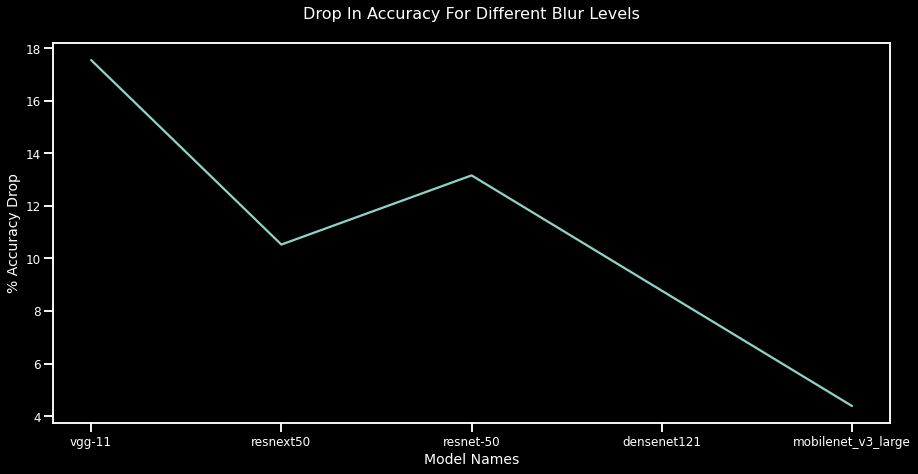

In [14]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=stim_config.model_names, y=blur_acc_change_list)
plt.title("Drop In Accuracy For Different Blur Levels")
plt.xlabel("Model Names")
plt.ylabel("% Accuracy Drop")